# Classical and Streaming Algorithms


-- Generating the stream
:generating randomly with 100 elements between -10 and 10

-- classicalAlg
:memory = {'mean': -1.9658499999999999, 'std': 19.979996154341475, 'zscoreL': -61.90583846302442, 'zscoreH': 57.97413846302442}

-- streamAlg
:memory = {'sum': -196.58500000000006, 'count': 100, 'sumsquares': 38841.008516334354, 'mean': -1.9658500000000005, 'std': 19.708122314501285, 'zscoreL': -61.09021694350386, 'zscoreH': 57.158516943503855}
:statistics
  - classical memory usage = 104
  - stream memory usage = 7
  - stream uses only 6.731% of the memory

-- Compare ['mean'] with ['mean']
:cache_instances 100
:first 3 values of the stream [0, 0.089, 7.375]

-- Compare ['std'] with ['std']
:cache_instances 100
:first 3 values of the stream [0, 0.089, 7.375]

-- Compare ['zscoreL'] with ['zscoreL']
:cache_instances 100
:first 3 values of the stream [0, 0.089, 7.375]

-- Compare ['zscoreH'] with ['zscoreH']
:cache_instances 100
:first 3 values of the stream [0, 0.089, 7.375]


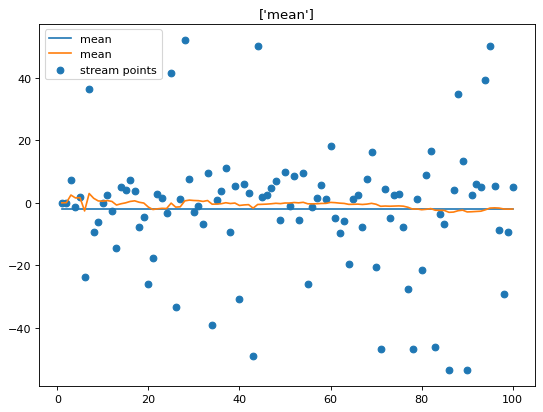

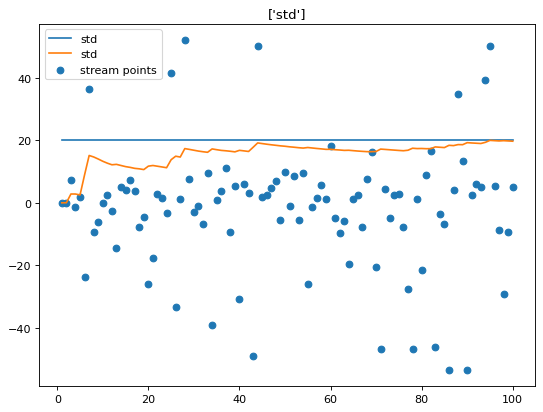

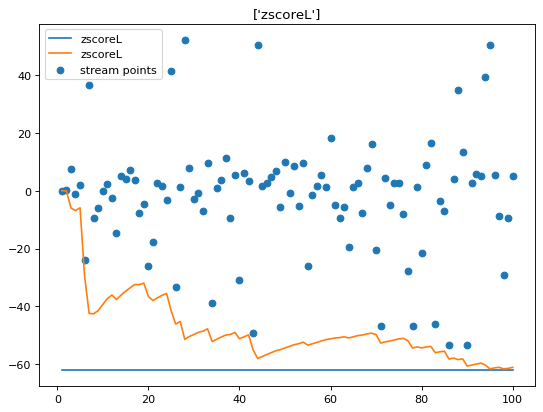

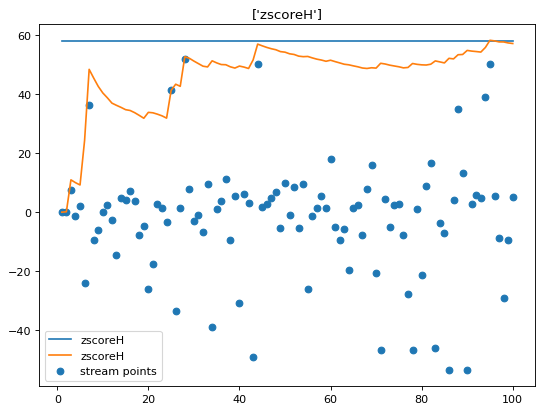

In [2]:
from libs.simulateStream import *
import numpy as np

## THE CLASSICAL ALGORITHM THAT YOU SHOULD IMPLEMENT

def classicalAlg(stream): #function that calls the stream values into our problem - it only runs when it is called
    A = np.array(stream)
    memory = {'mean': A.mean()}
    memory['std'] = A.std()
    memory['zscoreL'] = memory['mean'] - 3*(memory['std'])
    memory['zscoreH'] = memory['mean'] + 3*(memory['std'])

    return memory #we introduce the key-values of 'mean' and 'std' (our variables) in the dictionary 'memory'

#######################################################################################
## THE STREAMING ALGORITHM THAT YOU SHOULD IMPLEMENT

def streamAlg_init(memory): #function to initialize our variables (in streaming)

    # internal variables
    memory['sum'] = 0
    memory['count'] = 0
    memory['sumsquares'] = 0

    # result variables
    memory['mean'] = None
    memory['std'] = 0

    return memory

def streamAlg_run(memory, x): #function to run our variables after initialization

    # internal variables
    memory['count'] += 1 #same as memory['count'] = memory['count'] + 1
    N = memory['count']

    memory['sum'] += x
    mean = memory['sum']/N
    memory['sumsquares'] += (mean-x)**2

    # result variables
    memory['mean'] = mean
    memory['std'] = ((1/N)*memory['sumsquares'])**(0.5)
    memory['zscoreL'] = mean - 3*(memory['std'])
    memory['zscoreH'] = mean + 3*(memory['std'])

    return memory

ss = SimulateStream(N=100, min=-10, max=10, outliers=0.3, classicalAlg=classicalAlg,streamAlg_init=streamAlg_init, streamAlg_run=streamAlg_run)
# represents the fuction to simulate the stream 
ss.compare(['mean'],['mean'])
ss.compare(['std'],['std'])
ss.compare(['zscoreL'],['zscoreL'])
ss.compare(['zscoreH'],['zscoreH'])